In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bandits import Bandit, Gradient_Bandit

Text(0, 0.5, 'Action')

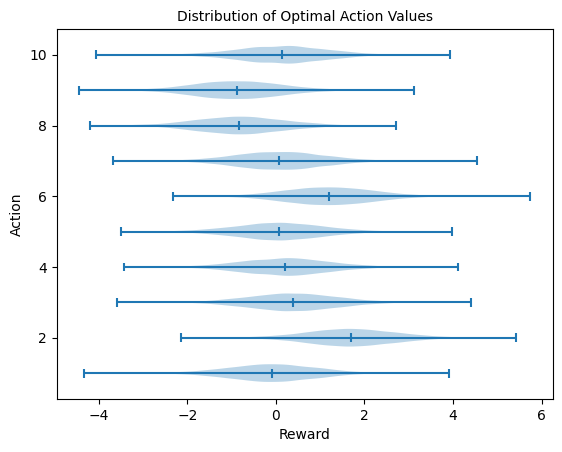

In [3]:
num_actions = 10
arms_mean = 0
arms_spread = 1
standard_deviations = 1*np.ones(num_actions)
# establish the optimal action values for the stationary problem
optimal_action_values = np.random.normal(loc=arms_mean, scale=arms_spread, size=num_actions)

num_samples = 10000
visualization_data = np.zeros(shape=(num_actions, num_samples))
for i in range(num_actions):
    visualization_data[i] = np.random.normal(loc=optimal_action_values[i], scale=standard_deviations[i], size=num_samples)

axis = plt.subplot(1, 1, 1)
axis.violinplot(visualization_data.T, vert=False, showextrema=True, showmeans=True)
axis.set_title("Distribution of Optimal Action Values", fontdict={'fontsize':10})
axis.set_xlabel('Reward')
axis.set_ylabel('Action')

In [4]:
# Testing strategies on the stationary task

In [5]:
# Testing the greedy and epsilon strategies

initial_action_values = np.zeros(num_actions)
num_timesteps = 1000
num_runs = 1000

bandit = Bandit()
greedy_means, greedy_stds, greedy_vd, greedy_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'greedy', [], reward_formulation='simple_average')
eps_greedy_0p05_means, eps_greedy_0p05_stds, eps_greedy_0p05_vd, eps_greedy_0p05_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.05], reward_formulation='simple_average')
eps_greedy_0p1_means, eps_greedy_0p1_stds, eps_greedy_0p1_vd, eps_greedy_0p1_opt_exec_dist  = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.1], reward_formulation='simple_average')
eps_greedy_0p2_means, eps_greedy_0p2_stds, eps_greedy_0p2_vd, eps_greedy_0p2_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.2], reward_formulation='simple_average')

Text(0.5, 0, 'Steps')

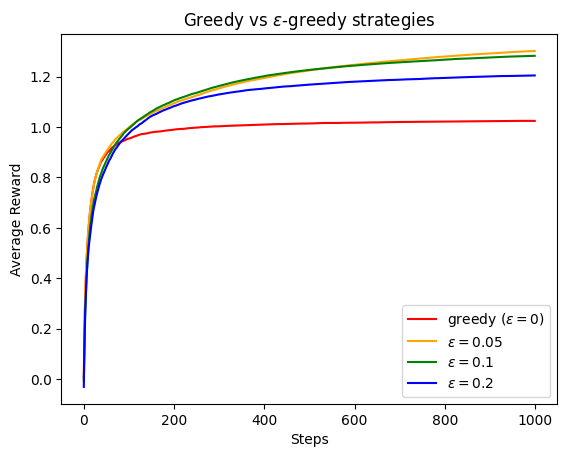

In [6]:
axis = plt.subplot(1, 1, 1)
axis.plot(greedy_means, label='greedy ($\epsilon=0$)', c='red')
axis.plot(eps_greedy_0p05_means, label='$\epsilon=0.05$', c='orange')
axis.plot(eps_greedy_0p1_means, label='$\epsilon=0.1$', c='green')
axis.plot(eps_greedy_0p2_means, label='$\epsilon=0.2$', c='blue')
axis.legend()
axis.set_title('Greedy vs $\epsilon$-greedy strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

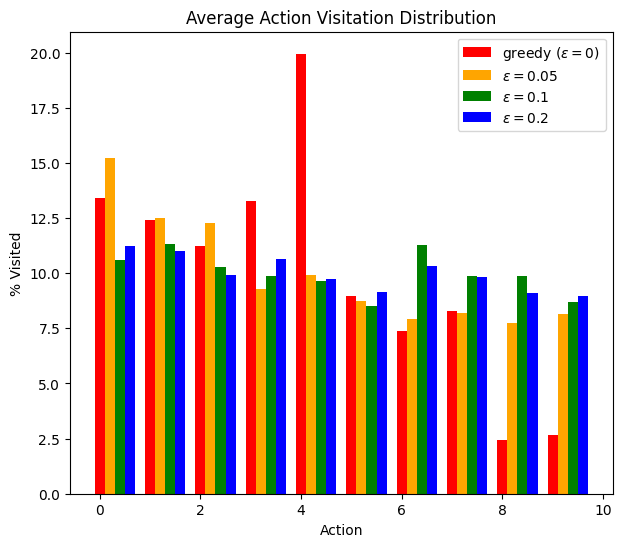

In [7]:
bar_width = 0.2
plt.figure(figsize=(7, 6))
axis = plt.subplot(1, 1, 1)
axis.bar(np.arange(num_actions), 100*greedy_vd/np.sum(greedy_vd), label='greedy ($\epsilon=0$)', color='red', width=bar_width)
axis.bar(np.arange(num_actions)+bar_width, 100*eps_greedy_0p05_vd/np.sum(eps_greedy_0p05_vd), label='$\epsilon=0.05$', color='orange', width=bar_width)
axis.bar(np.arange(num_actions)+2*bar_width, 100*eps_greedy_0p1_vd/np.sum(eps_greedy_0p1_vd), label='$\epsilon=0.1$', color='green', width=bar_width)
axis.bar(np.arange(num_actions)+3*bar_width, 100*eps_greedy_0p2_vd/np.sum(eps_greedy_0p2_vd), label='$\epsilon=0.2$', color='blue', width=bar_width)
axis.set_title("Average Action Visitation Distribution")
axis.set_xlabel('Action')
axis.set_ylabel('% Visited')
axis.legend()

Text(0.5, 0, 'Steps')

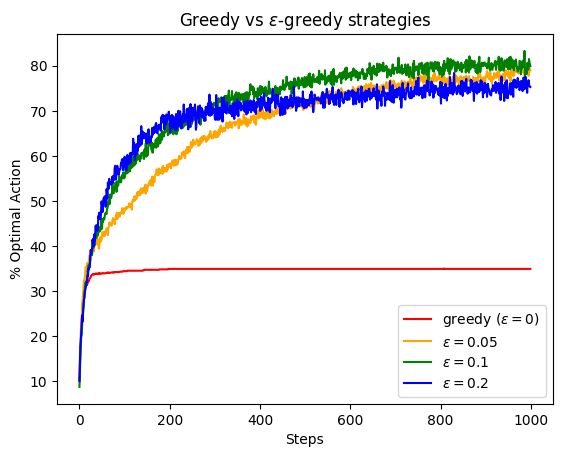

In [8]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*greedy_opt_exec_dist/num_runs, label='greedy ($\epsilon=0$)', c='red')
axis.plot(100*eps_greedy_0p05_opt_exec_dist/num_runs, label='$\epsilon=0.05$', c='orange')
axis.plot(100*eps_greedy_0p1_opt_exec_dist/num_runs, label='$\epsilon=0.1$', c='green')
axis.plot(100*eps_greedy_0p2_opt_exec_dist/num_runs, label='$\epsilon=0.2$', c='blue')
axis.legend()
axis.set_title('Greedy vs $\epsilon$-greedy strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')

In [9]:
# Clearly the greedy strategy visits one action disproportionately more than others and performs poorer

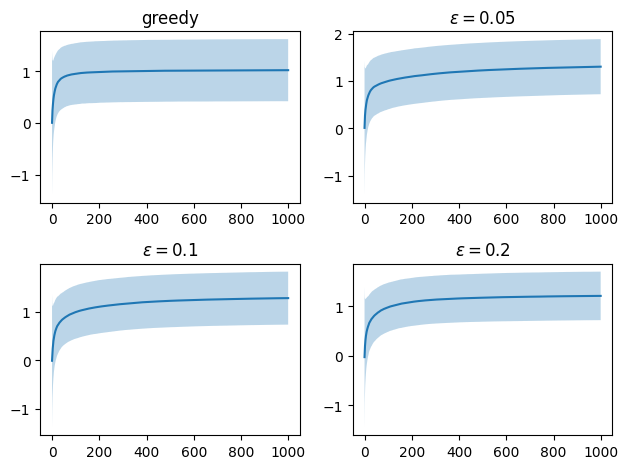

In [10]:
# Now lets plot the spread and see which policy is lowest in variance

axis = plt.subplot(2, 2, 1)
lower = greedy_means - greedy_stds
upper = greedy_means + greedy_stds
axis.fill_between(np.arange(num_timesteps), lower, upper, alpha=0.3)
axis.plot(greedy_means)
axis.set_title('greedy')

axis = plt.subplot(2, 2, 2)
lower = eps_greedy_0p05_means - eps_greedy_0p05_stds
upper = eps_greedy_0p05_means + eps_greedy_0p05_stds
axis.fill_between(np.arange(num_timesteps), lower, upper, alpha=0.3)
axis.plot(eps_greedy_0p05_means)
axis.set_title('$\epsilon=0.05$')

axis = plt.subplot(2, 2, 3)
lower = eps_greedy_0p1_means - eps_greedy_0p1_stds
upper = eps_greedy_0p1_means + eps_greedy_0p1_stds
axis.fill_between(np.arange(num_timesteps), lower, upper, alpha=0.3)
axis.plot(eps_greedy_0p1_means)
axis.set_title('$\epsilon=0.1$')

axis = plt.subplot(2, 2, 4)
lower = eps_greedy_0p2_means - eps_greedy_0p2_stds
upper = eps_greedy_0p2_means + eps_greedy_0p2_stds
axis.fill_between(np.arange(num_timesteps), lower, upper, alpha=0.3)
axis.plot(eps_greedy_0p2_means)
axis.set_title('$\epsilon=0.2$')

plt.tight_layout()

In [11]:
# Greedy is clearly higher than the others in reward variance

In [12]:
# Now we introduce a new strategy - the upper confidence bound method
ucb_means, ucb_std, ucb_vd, ucb_opt_exec_distr = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'upper_confidence_bound', [2])

Text(0.5, 0, 'Steps')

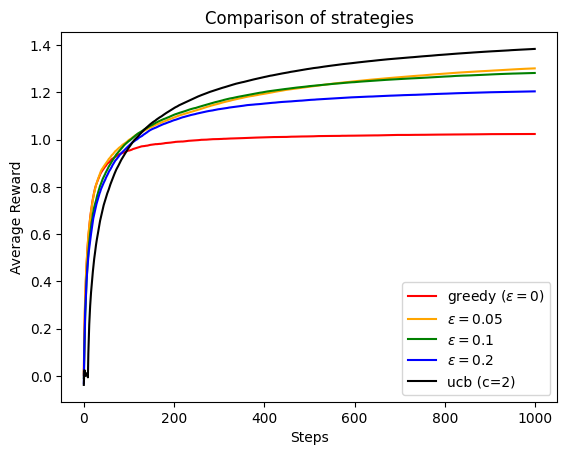

In [13]:
axis = plt.subplot(1, 1, 1)
axis.plot(greedy_means, label='greedy ($\epsilon=0$)', c='red')
axis.plot(eps_greedy_0p05_means, label='$\epsilon=0.05$', c='orange')
axis.plot(eps_greedy_0p1_means, label='$\epsilon=0.1$', c='green')
axis.plot(eps_greedy_0p2_means, label='$\epsilon=0.2$', c='blue')
axis.plot(ucb_means, label='ucb (c=2)', c='black')
axis.legend()
axis.set_title('Comparison of strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

Text(0.5, 0, 'Steps')

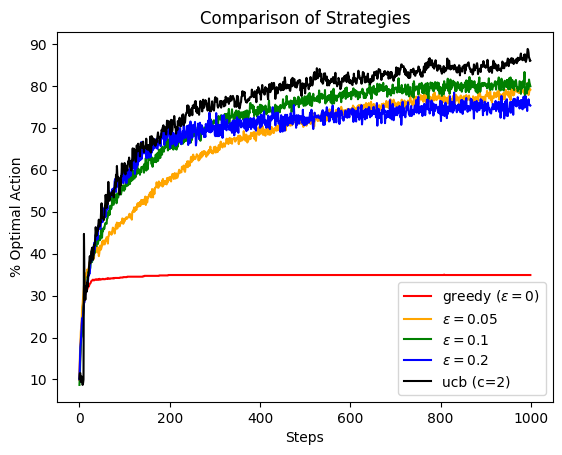

In [14]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*greedy_opt_exec_dist/num_runs, label='greedy ($\epsilon=0$)', c='red')
axis.plot(100*eps_greedy_0p05_opt_exec_dist/num_runs, label='$\epsilon=0.05$', c='orange')
axis.plot(100*eps_greedy_0p1_opt_exec_dist/num_runs, label='$\epsilon=0.1$', c='green')
axis.plot(100*eps_greedy_0p2_opt_exec_dist/num_runs, label='$\epsilon=0.2$', c='blue')
axis.plot(100*ucb_opt_exec_distr/num_runs, label='ucb (c=2)', c='black')
axis.legend()
axis.set_title('Comparison of Strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')

In [15]:
# That's great - the UCB stratgey outperforms any of the epsilon-greedy strategies!
# Next we test using the fixed step size formulation - first on the stationary task and then on a nonstationary task

In [16]:
# stationary, moving average formulation

initial_action_values = np.zeros(num_actions)
num_timesteps = 1000
num_runs = 1000

bandit = Bandit()
greedy_means, _, _, greedy_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'greedy', [], reward_formulation='moving_average', step_size=0.1)
eps_greedy_0p05_means, _, _, eps_greedy_0p05_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.05], reward_formulation='moving_average', step_size=0.1)
eps_greedy_0p1_means, _, _, eps_greedy_0p1_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.1], reward_formulation='moving_average', step_size=0.1)
eps_greedy_0p2_means, _, _, eps_greedy_0p2_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.2], reward_formulation='moving_average', step_size=0.1)
ucb_means, _, _, ucb_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, initial_action_values, num_timesteps, num_runs, 'upper_confidence_bound', [2], reward_formulation='moving_average', step_size=0.1)

Text(0.5, 0, 'Steps')

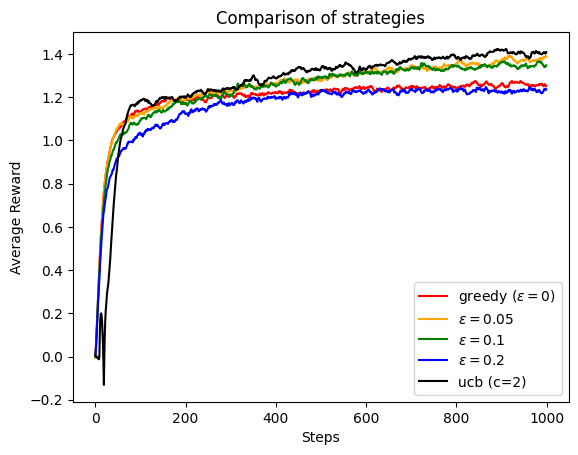

In [17]:
axis = plt.subplot(1, 1, 1)
axis.plot(greedy_means, label='greedy ($\epsilon=0$)', c='red')
axis.plot(eps_greedy_0p05_means, label='$\epsilon=0.05$', c='orange')
axis.plot(eps_greedy_0p1_means, label='$\epsilon=0.1$', c='green')
axis.plot(eps_greedy_0p2_means, label='$\epsilon=0.2$', c='blue')
axis.plot(ucb_means, label='ucb (c=2)', c='black')
axis.legend()
axis.set_title('Comparison of strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

Text(0.5, 0, 'Steps')

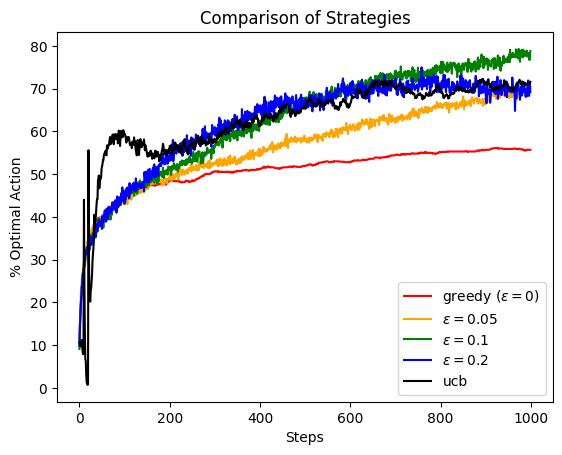

In [18]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*greedy_opt_exec_dist/num_runs, label='greedy ($\epsilon=0$)', c='red')
axis.plot(100*eps_greedy_0p05_opt_exec_dist/num_runs, label='$\epsilon=0.05$', c='orange')
axis.plot(100*eps_greedy_0p1_opt_exec_dist/num_runs, label='$\epsilon=0.1$', c='green')
axis.plot(100*eps_greedy_0p2_opt_exec_dist/num_runs, label='$\epsilon=0.2$', c='blue')
axis.plot(100*ucb_opt_exec_dist/num_runs, label='ucb', c='black')
axis.legend()
axis.set_title('Comparison of Strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')

In [19]:
# Clearly with a different reward formulation, the best strategy changes. Here UCB isn't doing as well as it used to!

In [20]:
# Nonstationary

initial_action_values = np.zeros(num_actions)
num_timesteps = 1000
num_runs = 1000

bandit = Bandit()
eps_greedy_simple_means, _, _, eps_greedy_simple_opt_exec_dist = bandit.test_nonstationary(num_actions,arms_mean, arms_spread, standard_deviations, 0.01, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.01], reward_formulation='simple_average')
eps_greedy_moving_means, _, _, eps_greedy_moving_opt_exec_dist = bandit.test_nonstationary(num_actions,arms_mean, arms_spread, standard_deviations, 0.01, initial_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.01], reward_formulation='moving_average', step_size=0.1)

Text(0.5, 0, 'Steps')

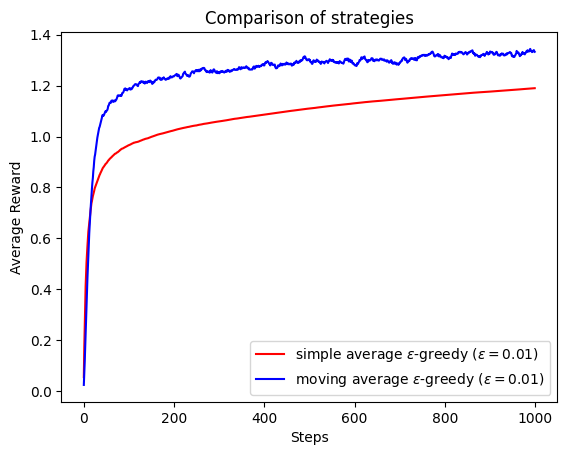

In [21]:
axis = plt.subplot(1, 1, 1)
axis.plot(eps_greedy_simple_means, label='simple average $\epsilon$-greedy ($\epsilon=0.01$)', c='red')
axis.plot(eps_greedy_moving_means, label='moving average $\epsilon$-greedy ($\epsilon=0.01$)', c='blue')
axis.legend()
axis.set_title('Comparison of strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

Text(0.5, 0, 'Steps')

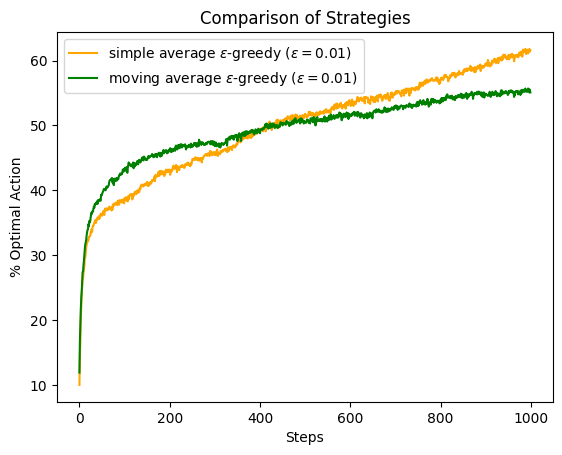

In [22]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*eps_greedy_simple_opt_exec_dist/num_runs, label='simple average $\epsilon$-greedy ($\epsilon=0.01$)', c='orange')
axis.plot(100*eps_greedy_moving_opt_exec_dist/num_runs, label='moving average $\epsilon$-greedy ($\epsilon=0.01$)', c='green')
axis.legend()
axis.set_title('Comparison of Strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')

In [23]:
# Now we can study optimistic initialization

neutral_action_values = np.zeros(num_actions)
optimistic_action_values = 5*np.ones(num_actions)
num_timesteps = 1000
num_runs = 1000

bandit = Bandit()
eps_greedy_neutral_means, _, _, eps_greedy_neutral_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, neutral_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.05], reward_formulation='moving_average', step_size=0.1)
eps_greedy_optimistic_means, _, _, eps_greedy_optimistic_opt_exec_dist = bandit.test_stationary(num_actions,arms_mean, arms_spread, standard_deviations, optimistic_action_values, num_timesteps, num_runs, 'epsilon_greedy', [0.05], reward_formulation='moving_average', step_size=0.1)

Text(0.5, 0, 'Steps')

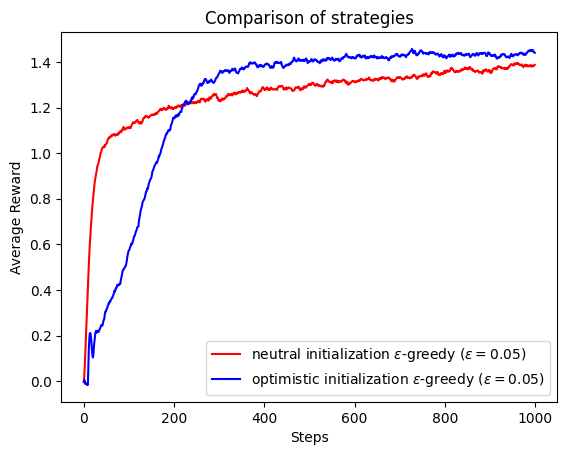

In [24]:
axis = plt.subplot(1, 1, 1)
axis.plot(eps_greedy_neutral_means, label='neutral initialization $\epsilon$-greedy ($\epsilon=0.05$)', c='red')
axis.plot(eps_greedy_optimistic_means, label='optimistic initialization $\epsilon$-greedy ($\epsilon=0.05$)', c='blue')
axis.legend()
axis.set_title('Comparison of strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

Text(0.5, 0, 'Steps')

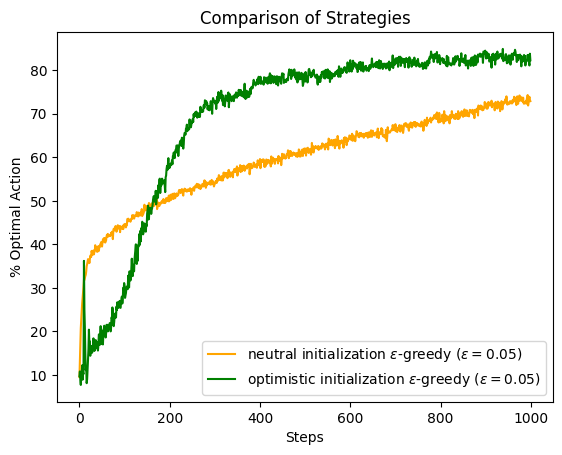

In [25]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*eps_greedy_neutral_opt_exec_dist/num_runs, label='neutral initialization $\epsilon$-greedy ($\epsilon=0.05$)', c='orange')
axis.plot(100*eps_greedy_optimistic_opt_exec_dist/num_runs, label='optimistic initialization $\epsilon$-greedy ($\epsilon=0.05$)', c='green')
axis.legend()
axis.set_title('Comparison of Strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')

In [26]:
# Evidently, optimistic initialization does poorly initially but soon overtakes unbiased initialization

In [27]:
# Next we explore the gradient bandit algorithm

num_timesteps = 1000
num_runs = 1000
arms_mean = 4

gradient_bandit = Gradient_Bandit()
no_base_eps_0p1_means, _, _, no_base_eps_0p1_opt_exec_dist = gradient_bandit.test_stationary(num_actions, arms_mean, arms_spread, standard_deviations, num_timesteps, num_runs, 0.1, use_baseline=False)
no_base_eps_0p4_means, _, _, no_base_eps_0p4_opt_exec_dist = gradient_bandit.test_stationary(num_actions, arms_mean, arms_spread, standard_deviations, num_timesteps, num_runs, 0.4, use_baseline=False)
base_eps_0p1_means, _, _, base_eps_0p1_opt_exec_dist = gradient_bandit.test_stationary(num_actions, arms_mean, arms_spread, standard_deviations, num_timesteps, num_runs, 0.1, use_baseline=True)
base_eps_0p4_means, _, _, base_eps_0p4_opt_exec_dist = gradient_bandit.test_stationary(num_actions, arms_mean, arms_spread, standard_deviations, num_timesteps, num_runs, 0.4, use_baseline=True)

Text(0.5, 0, 'Steps')

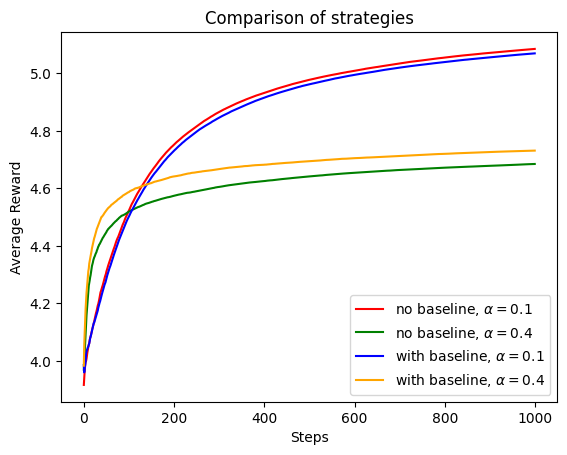

In [28]:
axis = plt.subplot(1, 1, 1)
axis.plot(no_base_eps_0p1_means, label=r"no baseline, $\alpha=0.1$", c='red')
axis.plot(no_base_eps_0p4_means, label=r'no baseline, $\alpha=0.4$', c='green')
axis.plot(base_eps_0p1_means, label=r'with baseline, $\alpha=0.1$', c='blue')
axis.plot(base_eps_0p4_means, label=r'with baseline, $\alpha=0.4$', c='orange')
axis.legend()
axis.set_title('Comparison of strategies')
axis.set_ylabel('Average Reward')
axis.set_xlabel('Steps')

Text(0.5, 0, 'Steps')

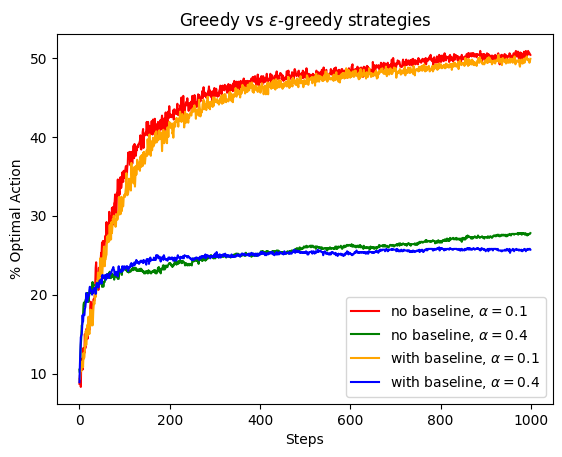

In [29]:
axis = plt.subplot(1, 1, 1)
axis.plot(100*no_base_eps_0p1_opt_exec_dist/num_runs, label=r"no baseline, $\alpha=0.1$", c='red')
axis.plot(100*no_base_eps_0p4_opt_exec_dist/num_runs, label=r"no baseline, $\alpha=0.4$", c='green')
axis.plot(100*base_eps_0p1_opt_exec_dist/num_runs, label=r"with baseline, $\alpha=0.1$", c='orange')
axis.plot(100*base_eps_0p4_opt_exec_dist/num_runs, label=r"with baseline, $\alpha=0.4$", c='blue')

axis.legend()
axis.set_title('Greedy vs $\epsilon$-greedy strategies')
axis.set_ylabel('% Optimal Action')
axis.set_xlabel('Steps')